In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [23]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_td_salary_19-20')

In [24]:
qbs.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [25]:
qbs.head()

,NAME,TD,TD_rank,salary
0,Lamar Jackson,31,2.5,2367912
1,Russell Wilson,31,2.5,35000000
2,Carson Wentz,27,6.0,32000000
3,Jimmy Garoppolo,27,6.0,27500000
4,Drew Brees,27,6.0,25000000


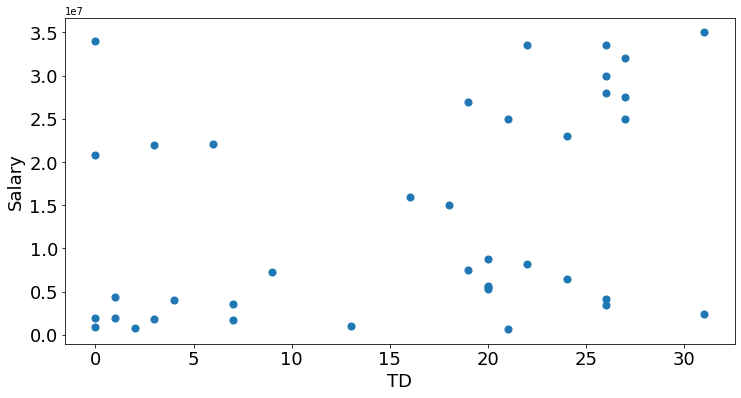

In [26]:
ax = qbs.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [27]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['TD', 'salary']])

In [28]:
X.mean(axis = 0)

array([-1.25255931e-16, -5.69345141e-18])

In [29]:
X.std(axis = 0)

array([1., 1.])

In [30]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [31]:
km.cluster_centers_

array([[ 0.90705699,  1.27772254],
       [ 0.28193844, -0.47368157],
       [-1.2036027 , -0.91208795],
       [-1.31550482,  0.91615652],
       [ 0.95659469, -0.86711207]])

In [32]:
km.predict(X)

array([4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 1, 0, 0, 4, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2], dtype=int32)

In [33]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,TD,TD_rank,salary,clusters
0,Lamar Jackson,31,2.5,2367912,4
1,Russell Wilson,31,2.5,35000000,0
2,Carson Wentz,27,6.0,32000000,0
3,Jimmy Garoppolo,27,6.0,27500000,0
4,Drew Brees,27,6.0,25000000,0


In [34]:
ss.inverse_transform(km.cluster_centers_)

array([[2.50909091e+01, 2.90454545e+07],
       [1.86666667e+01, 8.10935856e+06],
       [3.40000000e+00, 2.86869590e+06],
       [2.25000000e+00, 2.47233332e+07],
       [2.56000000e+01, 3.40633280e+06]])

In [35]:
qbs.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,25.090909,2.904545e+07
1,18.666667,8.109359e+06
2,3.400000,2.868696e+06
3,2.250000,2.472333e+07
4,25.600000,3.406333e+06


In [36]:
centroids = qbs.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

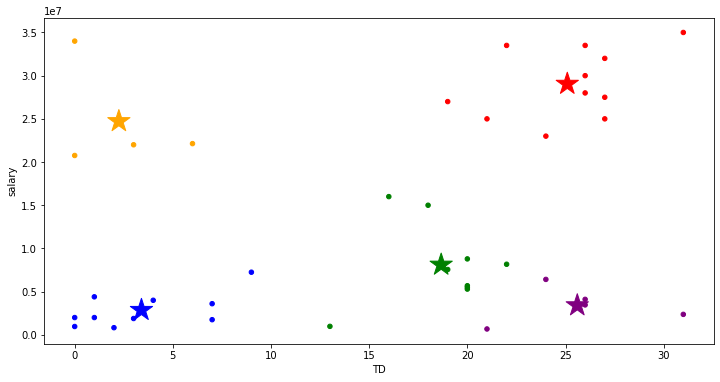

In [37]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [38]:
km.inertia_

6.836622849918673

In [39]:
silhouette_score(X, km.labels_)

0.5545079843582906